# NFL Databowl Exploratory Data Analysis
By one Tushar Khan ... I don't know what I'm doing

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np

In [2]:
# Get path to data folder
import os
data_path = os.path.join(os.path.split(os.getcwd())[0], 'data')

# Load data
df = pd.read_csv(os.path.join(data_path, 'clean_data.csv'), index_col=0)

# Display data
pd.set_option('display.max_columns', None) # displays all columns
df.sample(5)

,GameId,PlayId,Team,X,Y,S,A,Dis,Orientation,Dir,DisplayName,JerseyNumber,Season,YardLine,Quarter,GameClock,PossessionTeam,Down,Distance,FieldPosition,HomeScoreBeforePlay,VisitorScoreBeforePlay,OffensePersonnel,DefendersInTheBox,DefensePersonnel,PlayDirection,Yards,PlayerHeight,PlayerWeight,PlayerCollegeName,Position,HomeTeamAbbr,VisitorTeamAbbr,Week,Stadium,Location,StadiumType,Turf,GameWeather,Temperature,Humidity,WindSpeed,WindDirection,DefendersInTheBox_vs_Distance,HomePossesion,Field_eq_Possession,HomeField,Formation_ACE,Formation_EMPTY,Formation_I_FORM,Formation_JUMBO,Formation_PISTOL,Formation_SHOTGUN,Formation_SINGLEBACK,Formation_WILDCAT,PlayerBMI,TimeDelta,PlayerAge,IsRusher,YardsLeft
601481,2019102001,20191020011662,False,47.16,19.55,1.63,0.53,0.16,272.90,233.62,Eric Rowe,21,2019,25,2,351.0,BUF,1,10,BUF,9,14,"1 RB, 2 TE, 2 WR",7.0,"4 DL, 3 LB, 4 DB",False,3,73,205,Utah,CB,BUF,MIA,7,New Era Field,Orchard Park NY,1.0,False,2.0,65.0,54.0,7.0,1.250,0.70,True,True,True,0,0,0,0,0,0,1,0,27.043535,1.0,27.046564,False,25
428149,2018112508,20181125082829,False,94.71,30.67,1.49,1.20,0.15,306.48,236.93,Markus Golden,44,2018,15,3,54.0,LAC,4,1,ARZ,35,10,"6 OL, 2 RB, 1 TE, 1 WR",8.0,"4 DL, 2 LB, 5 DB",False,13,75,260,Missouri,OLB,LAC,ARZ,12,StubHub Center,"Carson, CA",NaN,True,-0.5,74.0,52.0,3.0,0.000,8.00,True,False,False,0,0,1,0,0,0,0,0,32.494222,2.0,27.706962,False,85
376693,2018102811,20181028112465,False,71.18,26.08,1.02,1.76,0.09,295.69,96.90,Marcus Williams,43,2018,42,3,406.0,MIN,1,10,MIN,13,20,"1 RB, 1 TE, 3 WR",7.0,"4 DL, 2 LB, 5 DB",False,2,73,195,Utah,FS,MIN,NO,8,U.S. Bank Stadium,"Minneapolis, MN",0.0,False,3.0,NaN,0.0,NaN,NaN,0.70,True,True,True,0,0,0,0,0,0,1,0,25.724339,2.0,22.138522,False,42
414296,2018111809,20181118091570,True,51.60,28.28,2.67,1.36,0.27,272.97,169.87,Tyeler Davison,95,2018,41,2,375.0,PHI,2,4,PHI,17,7,"1 RB, 1 TE, 3 WR",7.0,"4 DL, 2 LB, 5 DB",False,6,74,309,Fresno State,DT,NO,PHI,11,Mercedes-Benz Superdome,"New Orleans, LA",NaN,False,3.0,68.0,54.0,4.0,0.500,1.75,False,True,False,0,0,0,0,0,0,1,0,39.668919,2.0,26.209282,False,59
464231,2018121500,20181215003285,False,51.40,29.52,3.12,1.13,0.31,263.67,191.51,Zach Cunningham,41,2018,39,4,641.0,NYJ,1,10,NYJ,15,19,"1 RB, 1 TE, 3 WR",5.0,"4 DL, 2 LB, 5 DB",True,2,75,238,Vanderbilt,ILB,NYJ,HST,15,Metlife Stadium,"East Rutherford, NJ",1.0,False,-1.0,51.0,85.0,8.0,0.125,0.50,True,True,True,0,0,0,0,0,1,0,0,29.744711,1.0,24.010946,False,61


## Basic Feature Exploration

In [9]:
# Number of games
len(df['GameId'].unique())

688

### Label Distribution

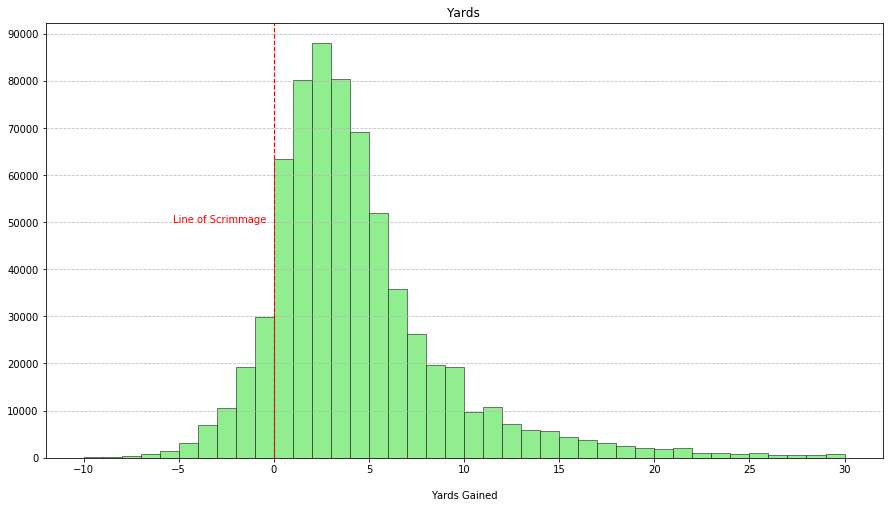

In [4]:
label = df.columns[26] # label to predict ('Yards')
yards_min, yards_max = -10, 30 # defines min and max label value for plots

fig, ax = plt.subplots(figsize=(15,8))
df.hist(column=label, range=(yards_min, yards_max), bins=yards_max-yards_min, linewidth=0.5, color='lightgreen', ec='black', ax=ax)

ax.xaxis.grid(False)
ax.yaxis.grid(True)
ax.yaxis.set_tick_params(grid_linestyle='--', grid_alpha=0.8) # set tick style
ax.yaxis.set_major_locator(plt.MultipleLocator(10_000)) # set tick interval
ax.set(xlabel="\nYards Gained\n")

# Draw line of scrimmage
plt.axvline(x=0, color='red', linestyle='--', linewidth=1.2)
plt.text(-5.3, 50_000, r'Line of Scrimmage', color='red')

plt.show()

### Feature Correlation Matrix

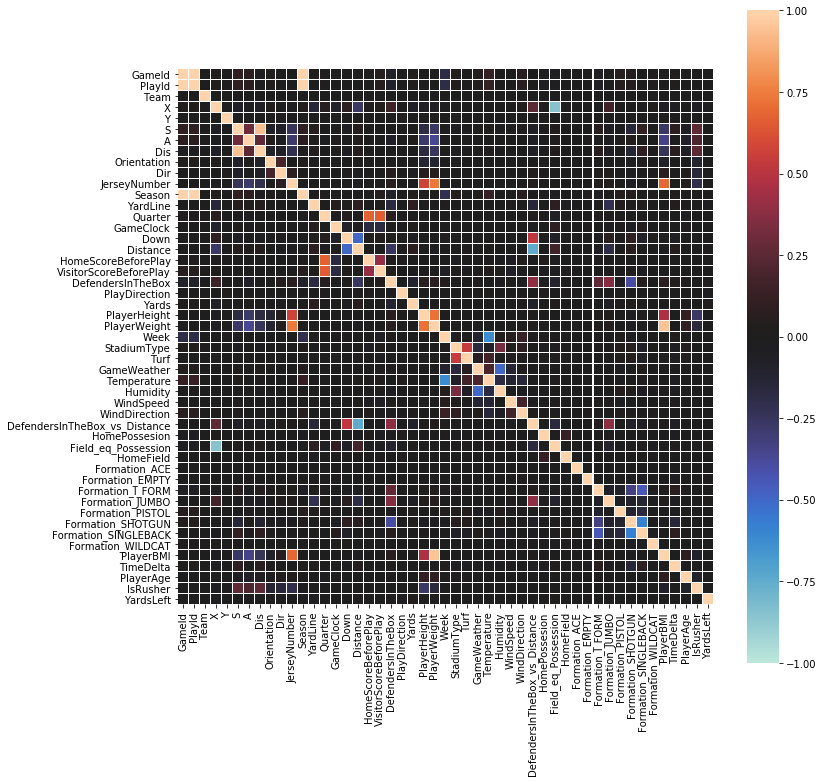

In [5]:
plt.figure(figsize=(12,12))
sn.heatmap(df.corr(), center=0, vmin=-1, vmax=1, square=True, linewidths=0.01)

### Feature-Label Correlation Exploration

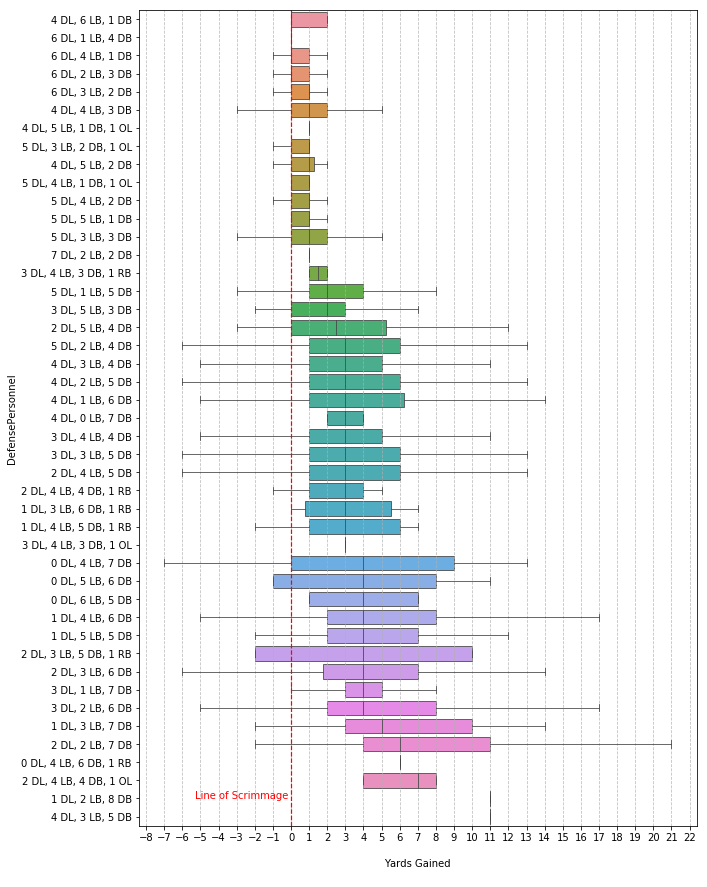

In [6]:
fig, ax = plt.subplots(figsize=(10,15))

# Sort groups by label median
order = df.groupby(by=['DefensePersonnel'])[label].median().sort_values(ascending=True).index
sn.boxplot(x=df[label], y=df['DefensePersonnel'], order=order, showfliers=False, linewidth=0.8, ax=ax)

ax.xaxis.grid(True)
ax.yaxis.grid(False)
ax.xaxis.set_tick_params(grid_linestyle='--', grid_alpha=0.8) # set tick style
ax.xaxis.set_major_locator(plt.MultipleLocator(1)) # set tick interval
ax.set(xlabel="\nYards Gained\n")

# Draw line of scrimmage
plt.axvline(x=0, color='red', linestyle='--', linewidth=1.2)
plt.text(-5.3, 43, r'Line of Scrimmage', color='red')

plt.show()

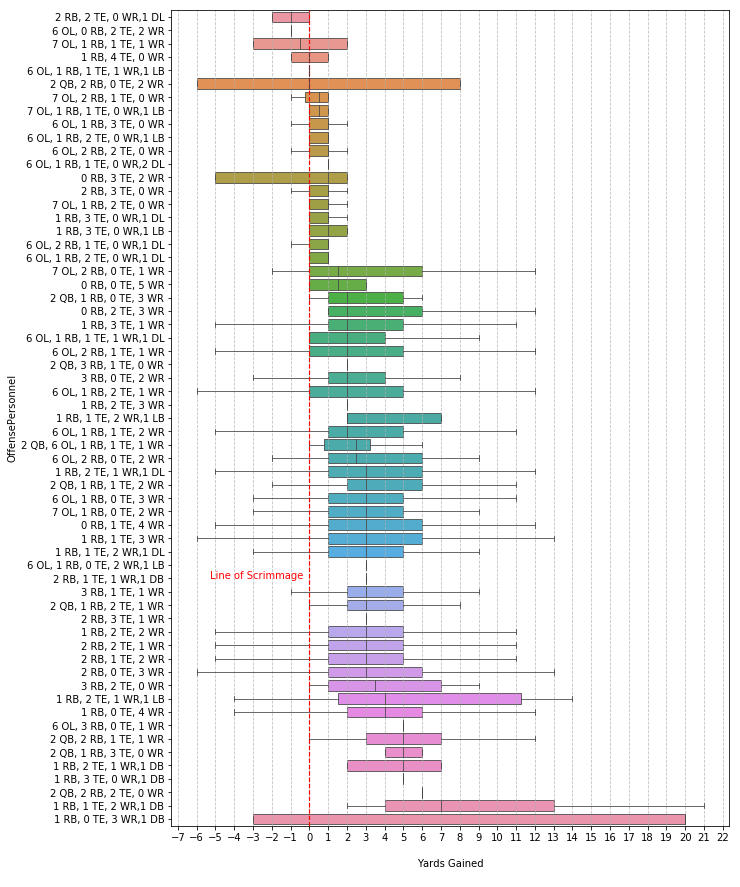

In [7]:
fig, ax = plt.subplots(figsize=(10,15))

# Sort groups by label median
order = df.groupby(by=['OffensePersonnel'])[label].median().sort_values(ascending=True).index
sn.boxplot(x=df[label], y=df['OffensePersonnel'], order=order, showfliers=False, linewidth=0.8, ax=ax)

ax.xaxis.grid(True)
ax.yaxis.grid(False)
ax.xaxis.set_tick_params(grid_linestyle='--', grid_alpha=0.8) # set tick style
ax.xaxis.set_major_locator(plt.MultipleLocator(1)) # set tick interval
ax.set(xlabel="\nYards Gained\n")

# Draw line of scrimmage
plt.axvline(x=0, color='red', linestyle='--', linewidth=1.2)
plt.text(-5.3, 42, r'Line of Scrimmage', color='red')

plt.show()